# Assignment 1
---

## Part 1

### Problem 1: N-Queens

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# class for N-Queens problem
# Place the queens in order from the leftmost column.
# Every Queen in each column must be compliant with the queens
# to the left of itself.
# From column 1 of row 1 to column 1 of the nth row,
# reposition the first queen and list the number of possible cases.
class Col:
    def __init__(self, pos, N, prev_board):
        self.col = None
        self.pos = pos # the column which a 'Col' class indicates
        self.N = N
        self.next_candid = np.arange(N) # candidates compliant with
                                        # the queens to the left columns
        self.mask = np.ones(N, dtype = bool)
        self.prev_board = prev_board
        self.updated_board = None # Board without conflict
                                  # between queens up to the previous column
        self.count = 0
                
    # Place the queens in the right to the latest queen's column
    # based on the self.next_candid NumPy array.
    # It yields an updated chess board every trial.
    def locate(self, candidates):
        self.col = np.zeros((self.N,))
        self.col[candidates[self.count]] = 1
        self.count += 1
        self.updated_board = self.prev_board.copy()
        self.updated_board[:, self.pos] = self.col
        
        return self.updated_board
    
    # Determine the possible position where the next right queen
    # can be located considering the self.update_board.
    def next_col_candid(self):
        self.mask = np.ones(self.N, dtype = bool)
        self.next_candid = np.arange(self.N)
        for j in range(self.N):
            if criteria(self.N, self.updated_board, self.pos + 1, j) == False:
                self.mask[[j]] = False
        self.next_candid = self.next_candid[self.mask]
        
        return self.next_candid

In [3]:
# Queens must comply with these rules.
def criteria(N, board, col, row):
    for i in range(col):
        # Check the left columns.
        if board[row][i] == 1: # the 1st rule: No two queens are allowed
                               # to be located in the same row.
            return False
        else:
            # Check the diagonal directions.
            for k in range(N): # the 2nd rule: No two queens are allowed
                               # to be located in any diagonal directions.
                if board[k][i] == 1 and (abs(k - row) == abs(i - col)):
                    return False

In [4]:
class Solutions:
    def __init__(self):
        self.solutions = []
        
    def add_sol(self, board):
        self.solutions.append(board)
        
    def display(self, N):
        for i in range(len(self.solutions)):
            # Queens are located at black cells.
            print(f"Case {i + 1}")
            plt.imshow(self.solutions[i], cmap = 'Greys');
            plt.show()
            print('\n')

In [5]:
def recursive(N, pos, prev_board, candidates):
    col = Col(pos, N, prev_board)
    for _ in range(len(candidates)):
        # Locate the current column's queen on the chess board
        # based on the previously determined deployment.
        updated_board = col.locate(candidates)
        if pos == (N - 1): # if the last column
            solutions.add_sol(updated_board)
        elif pos < (N - 1): # if not the last column
            next_candid = col.next_col_candid()
            if next_candid.all() == None: # if no possible candidate
                break
            else: # if recursive process possible (The next candidate exists.)
                recursive(N, pos + 1, updated_board, next_candid)
        else:
            break

In [6]:
def n_queens(N):
    pos = 0
    board = np.zeros((N, N))
    recursive(N, pos, board, np.arange(N))
    
    return solutions.solutions

In [7]:
# Insert the number of queens.
N = 4
solutions = Solutions()
n_queens(N)

[array([[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]]),
 array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]])]

Case 1


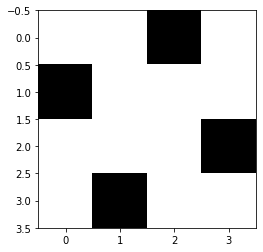



Case 2


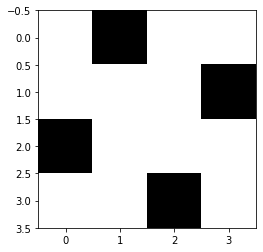

In [8]:
solutions.display(N)

In [9]:
# Insert the number of queens.
N = 5
solutions = Solutions()
n_queens(N)

[array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.]]),
 array([[0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.]]),
 array([[0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.]

Case 1


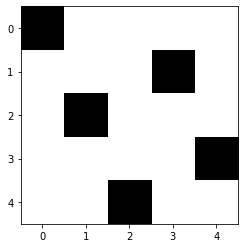



Case 2


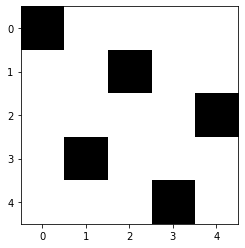



Case 3


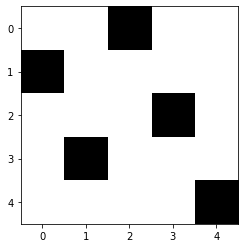



Case 4


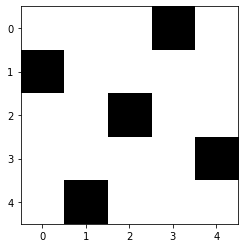



Case 5


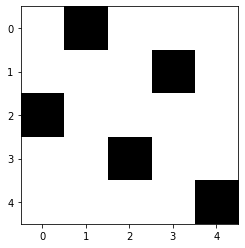



Case 6


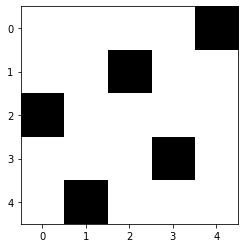



Case 7


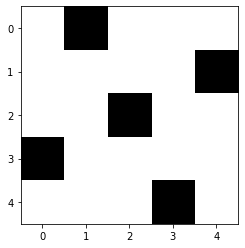



Case 8


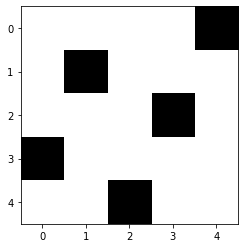



Case 9


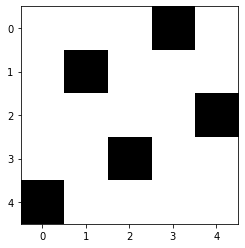



Case 10


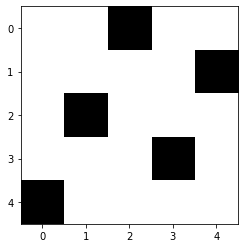

In [10]:
solutions.display(N)

### Problem 2: Tower of Hanoi

In [11]:
def move(n, start, target):
    print(f"Move the disk {n} from the rod {start} to the rod {target}.")

In [12]:
def tower_of_hanoi(n, start, auxiliary, target):
    """
    n: the number of disks
    start: starting rod
    auxiliary: auxiliary rod
    target: target rod
    """
    
    if (n == 1):
        move(n, start, target)
    else:
        tower_of_hanoi(n - 1, start, target, auxiliary)
        move(n, start, target)
        tower_of_hanoi(n - 1, auxiliary, start, target)

In [13]:
n = 3
start = 'A'
auxiliary = 'B'
target = 'C'

tower_of_hanoi(n, start, auxiliary, target)

Move the disk 1 from the rod A to the rod C.
Move the disk 2 from the rod A to the rod B.
Move the disk 1 from the rod C to the rod B.
Move the disk 3 from the rod A to the rod C.
Move the disk 1 from the rod B to the rod A.
Move the disk 2 from the rod B to the rod C.
Move the disk 1 from the rod A to the rod C.


### Problem 3: Rounded bracket generator

In [14]:
class RoundedBracketGenerator:
    def __init__(self, n):
        self.n = n
        self.count = 0
        self.cur = [] # the current n
        self.prev = [] # the previous n
        
    def recursive(self):
        
        while self.count < self.n:
            if self.count == 0:
                self.cur = ["()"]
            else:
                self.prev = list(self.cur)
                self.cur = []
        
                for i in self.prev:
                    temp = "(" + i + ")"
                    if temp not in self.cur:
                        self.cur.append(temp)
                    temp_2 = "()" + i
                    if temp_2 not in self.cur:
                        self.cur.append(temp_2)
                    temp_3 = i + "()"
                    if temp_3 not in self.cur:
                        self.cur.append(temp_3)
            
            self.count += 1
                
    def output(self):
        print(self.cur)

In [15]:
def rounded_bracket_generator(n):
    rbg = RoundedBracketGenerator(n)
    rbg.recursive()
    rbg.output()

In [16]:
# Insert the number of pairs.
rounded_bracket_generator(4)

['(((())))', '()((()))', '((()))()', '(()(()))', '()()(())', '()(())()', '((())())', '(())()()', '((()()))', '()(()())', '(()())()', '(()()())', '()()()()']


### Problem 4: RL Grid world safe zone detection

In [17]:
import numpy as np

In [18]:
class SafeZoneDetection:
    def __init__(self, gridworld):
        self.gridworld = gridworld
        self.height = self.gridworld.shape[0]
        self.width = self.gridworld.shape[1]
        
    def search(self):
        temp = self.gridworld.copy()
        for i in range(self.height):
            for j in range(self.width):
                if self.gridworld[i][j] == 'S':
                    if i < (self.height - 1) and j < (self.width - 1):
                        if self.gridworld[i + 1][j] == 'S':
                            temp[i + 1][j] = 'D'
                        if self.gridworld[i][j + 1] == 'S':
                            temp[i][j + 1] = 'D'
                    elif i == (self.height - 1) and j < (self.width - 1):
                        if self.gridworld[i][j + 1] == 'S':
                            temp[i][j + 1] = 'D'
                    elif i < (self.height - 1) and j == (self.width - 1):
                        if self.gridworld[i + 1][j] == 'S':
                            temp[i + 1][j] = 'D'
        
        return (temp == 'S').sum()

In [19]:
gridworld = np.array([['S', 'S', 'S', 'S', 'D'],
                      ['S', 'S', 'D', 'S', 'D'],
                      ['S', 'S', 'D', 'D', 'D'],
                      ['D', 'D', 'D', 'D', 'D']])

safe_zones = SafeZoneDetection(gridworld)
safe_zones.search()

1

In [20]:
gridworld2 = np.array([['S', 'S', 'D', 'D', 'D'],
                       ['S', 'S', 'D', 'D', 'D'],
                       ['D', 'D', 'S', 'D', 'D'],
                       ['D', 'D', 'D', 'S', 'S']])

safe_zones2 = SafeZoneDetection(gridworld2)
safe_zones2.search()

3

## Part 2 - Game Theory

Let us assume that all strategic form game payoff matrices are represented as NumPy arrays.
<br>
<br>
Example
```python
payoff_mat = np.array([[(1, 2), (-2, -3)],
                       [(-4, -3), (3, 2)]])
```
This example is nothing but the following payoff matrix.

| P1\P2 | S21 | S22 |
|------|------|------|
| S11 | (1, 2) | (-2, -3) |
| S21 | (-4, -3) | (3, 2) |

- P1: player 1
- P2: player 2
- S11: the strategy 1 of the player 1
- S12: the strategy 2 of the player 1
- S21: the strategy 1 of the player 2
- S22: the strategy 2 of the player 2

In [21]:
import numpy as np

In [22]:
class Strategic_Form:
    def __init__(self, payoff_mat):
        self.mat = payoff_mat
        # the number of strategies of the player 1
        self.num_str_1 = payoff_mat.shape[0]
        # the number of strategies of the player 2
        self.num_str_2 = payoff_mat.shape[1]
        self.ref_table_1 = None
        self.ref_table_2 = None
        self.best_response = None
        self.strong_dominant_1 = None
        self.strong_dominant_2 = None
        self.strong_weak_1 = None
        self.strong_weak_2 = None
        self.nash_equil = []
        self.maximin_1 = None
        self.maximin_2 = None
        self.minimax_1 = None
        self.minimax_2 = None
        
    def strongly_dominant(self):
        # player 1
        self.ref_table_1 = np.zeros((self.num_str_1, self.num_str_1))
        for i in range(self.num_str_1 - 1):
            for j in range(1, self.num_str_1):
                if i < j:
                    temp_prev = self.mat[i, :, 0]
                    temp_next = self.mat[j, :, 0]
                
                    if (temp_prev > temp_next).sum() == self.num_str_1:
                        self.ref_table_1[i][j] = 1
                    
                    if (temp_prev < temp_next).sum() == self.num_str_1:
                        self.ref_table_1[j][i] = 1
                else:
                    continue
                    
        temp_1 = self.ref_table_1.sum(axis = 1)
        if temp_1.max() == (self.num_str_1 - 1):
            self.strong_dominant_1 = temp_1.argmax()
            print(f"The player 1's strongly dominant strategy: " +
                  f"the strategy {self.strong_dominant_1 + 1}")
        else:
            print("The player 1 has no strongly dominant strategy.")
            
        # player 2
        self.ref_table_2 = np.zeros((self.num_str_2, self.num_str_2))
        for i in range(self.num_str_2 - 1):
            for j in range(1, self.num_str_2):
                if i < j:
                    temp_prev = self.mat[:, i, 1]
                    temp_next = self.mat[:, j, 1]
                
                    if (temp_prev > temp_next).sum() == self.num_str_2:
                        self.ref_table_2[i][j] = 1
                    
                    if (temp_prev < temp_next).sum() == self.num_str_2:
                        self.ref_table_2[j][i] = 1
                else:
                    continue
                    
        temp_2 = self.ref_table_2.sum(axis = 1)
        if temp_2.max() == (self.num_str_2 - 1):
            self.strong_dominant_2 = temp_2.argmax()
            print(f"The player 2's strongly dominant strategy: " +
                  f"the strategy {self.strong_dominant_2 + 1}")
        else:
            print("The player 2 has no strongly dominant strategy.")
        
    def weakly_dominant(self):
        # player 1
        self.ref_table_1 = np.zeros((self.num_str_1, self.num_str_1))
        for i in range(self.num_str_1 - 1):
            for j in range(1, self.num_str_1):
                if i < j:
                    temp_prev = self.mat[i, :, 0]
                    temp_next = self.mat[j, :, 0]
                
                    if (temp_prev >= temp_next).sum() == self.num_str_1:
                        self.ref_table_1[i][j] = 1
                    
                    if (temp_prev <= temp_next).sum() == self.num_str_1:
                        self.ref_table_1[j][i] = 1
                else:
                    continue
                    
        temp_1 = self.ref_table_1.sum(axis = 1)
        if temp_1.max() == (self.num_str_1 - 1):
            self.weak_dominant_1 = temp_1.argmax()
            print(f"The player 1's weakly dominant strategy: " +
                  f"the strategy {self.weak_dominant_1 + 1}")
        else:
            print("The player 1 has no weakly dominant strategy.")
            
        # player 2
        self.ref_table_2 = np.zeros((self.num_str_2, self.num_str_2))
        for i in range(self.num_str_2 - 1):
            for j in range(1, self.num_str_2):
                if i < j:
                    temp_prev = self.mat[:, i, 1]
                    temp_next = self.mat[:, j, 1]
                
                    if (temp_prev >= temp_next).sum() == self.num_str_2:
                        self.ref_table_2[i][j] = 1
                    
                    if (temp_prev <= temp_next).sum() == self.num_str_2:
                        self.ref_table_2[j][i] = 1
                else:
                    continue
                    
        temp_2 = self.ref_table_2.sum(axis = 1)
        if temp_2.max() == (self.num_str_2 - 1):
            self.weak_dominant_2 = temp_2.argmax()
            print(f"The player 2's weakly dominant strategy: " +
                  f"the strategy {self.weak_dominant_2 + 1}")
        else:
            print("The player 2 has no weakly dominant strategy.")
            
    def nash(self):
        self.best_response = np.zeros((self.num_str_1, self.num_str_2))
        # player 1's best response
        for i in range(self.num_str_2):
            max_1 = self.mat[:, i, 0].max()
            for j in range(self.num_str_1):
                if self.mat[j, i, 0] == max_1:
                    self.best_response[j][i] += 1
                    
        # player 2's best response
        for i in range(self.num_str_1):
            max_2 = self.mat[i, :, 1].max()
            for j in range(self.num_str_2):
                if self.mat[i, j, 1] == max_2:
                    self.best_response[i][j] += 1
        
        for k in range(self.num_str_1):
            for l in range(self.num_str_2):
                if self.best_response[k][l] == 2:
                    self.nash_equil.append((k, l))
                    print(f"Pure Strategy Nash Equilibrium: "
                          f"{(k + 1, l + 1)}")
                    
    def maximin(self):
        # maximin strategy: A maxmin strategy of player i is
        #                   one that maximizes its worst case payoff
        #                   in the situation where the other agent is
        #                   playing to cause it the greatest harm.
        minimums_1 = []
        for i in range(self.num_str_1):
            minimums_1.append(self.mat[i, :, 0].min())
        temp_1 = max(minimums_1)
        self.maximin_1 = minimums_1.index(temp_1)

        minimums_2 = []
        for i in range(self.num_str_2):
            minimums_2.append(self.mat[:, i, 1].min())
        temp_2 = max(minimums_2)
        self.maximin_2 = minimums_2.index(temp_2)
        
        return (self.maximin_1, self.maximin_2), self.mat[self.maximin_1][self.maximin_2]
    
    def minimax(self):
        # minimax strategy: A minmax strategy is the one that minimizes
        #                   the maximum payoff the other player can get.
        self.minimax_1 = self.mat[:, :, 1].max(axis = 1).argmin()
        self.minimax_2 = self.mat[:, :, 0].max(axis = 0).argmin()
        
        return (self.minimax_1, self.minimax_2), self.mat[self.minimax_1][self.minimax_2]

1. All strongly dominant strategies

In [23]:
mat = np.array([[(2, 4), (0, 1)], [(2, 5), (3, 3)]])
example = Strategic_Form(mat)
example.strongly_dominant()

The player 1 has no strongly dominant strategy.
The player 2's strongly dominant strategy: the strategy 1


2. All weakly dominant strategies

In [24]:
example.weakly_dominant()

The player 1's weakly dominant strategy: the strategy 2
The player 2's weakly dominant strategy: the strategy 1


3. Strongly dominant strategy equilibrium

In [25]:
if example.strong_dominant_1 != None and example.strong_dominant_2 != None:
    print((example.strong_dominant_1 + 1,
           example.strong_dominant_2 + 1))
else:
    print("There is no Strongly Dominant Strategy Equilibrium for the given payoff matrix.")

There is no Strongly Dominant Strategy Equilibrium for the given payoff matrix.


4. Weakly dominant strategy equilibrium

In [26]:
if example.weak_dominant_1 != None and example.weak_dominant_2 != None:
    print((example.weak_dominant_1 + 1,
           example.weak_dominant_2 + 1))
else:
    print("There is no Weakly Dominant Strategy Equilibrium for the given payoff matrix.")

(2, 1)


5. All pure strategy Nash equilibrium

In [27]:
example.nash()

Pure Strategy Nash Equilibrium: (1, 1)
Pure Strategy Nash Equilibrium: (2, 1)


6. Maxmin values of all players and all their maximin strategies

In [28]:
strategies, values = example.maximin()
print(f"Maximin strategies:\t(the strategy {strategies[0] + 1}, the strategy {strategies[1] + 1})")
print(f"Maximin payoff values:\t({values[0]}, {values[1]})")

Maximin strategies:	(the strategy 2, the strategy 1)
Maximin payoff values:	(2, 5)


7. Minmax values of all players and all minmax strategy profiles against each player

In [29]:
strategies, values = example.minimax()
print(f"Minimax strategies:\t(the strategy {strategies[0] + 1}, the strategy {strategies[1] + 1})")
print(f"Minimax payoff values:\t({values[0]}, {values[1]})")

Minimax strategies:	(the strategy 1, the strategy 1)
Minimax payoff values:	(2, 4)
